importing pandas numpy matplotlib seaborn and warning library


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [4]:
df=pd.read_csv("data/StudentsPerformance.csv")

In [5]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


3.1 check missing values

In [6]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

observation:- no missing values

3.2 check duplicates

In [7]:
df.duplicated().sum()

0

obs:- no duplicate element found

3.2 check data types

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


3.4 checking no. of unique values for each feature

In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

3.5 checking statistics of data

In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


obsetvations:-
mean is between 66 to 69 
std is between 14.6 to 15.1

numerical feature and categorical feature

In [11]:
numerical_feature= [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_feature= [feat for feat in df.columns if df[feat].dtype == 'O']

In [12]:
print("numerical features are:- ",numerical_feature)
print("categorical feature are :- ",categorical_feature)

numerical features are:-  ['math_score', 'reading_score', 'writing_score']
categorical feature are :-  ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


adding columns

In [14]:
df["total score"]= df["math_score"]+df["reading_score"]+ df["writing_score"]
df["average score"]=df["total score"]/3

In [15]:
#df.drop(columns=["total_score"],inplace=True)
#for droping a particular columns

q1:- no. of student with full marks in each subject

In [17]:
math_full=df[df["math_score"]==100]["math_score"].count()
writing_full=df[df["writing_score"]==100]["average score"].count()
reading_full=df[df["reading_score"]==100]["total score"].count()

In [18]:
print(f"no. of student in maths having full marks is {math_full}")
print(f"no. of student in writing having full marks is {writing_full}")
print(f"no. of student in reading having full marks is {reading_full} ")

no. of student in maths having full marks is 7
no. of student in writing having full marks is 14
no. of student in reading having full marks is 17 


In [21]:
math_less_20=df[df["math_score"]<20]["total score"].count()
reading_less_20=df[df["reading_score"]<20]["total score"].count()
writing_less_20=df[df["writing_score"]<20]["total score"].count()

In [22]:
print(f"no. of student having less than 20 marks in maths is {math_less_20}")
print(f"no. of student having less than 20 marks in reading is {reading_less_20}")
print(f"no. of student having less than 20 marks in writing is {writing_less_20}")

no. of student having less than 20 marks in maths is 4
no. of student having less than 20 marks in reading is 1
no. of student having less than 20 marks in writing is 3


observation:-
performance by the student is worst in maths and best in reading

Histogram & kde

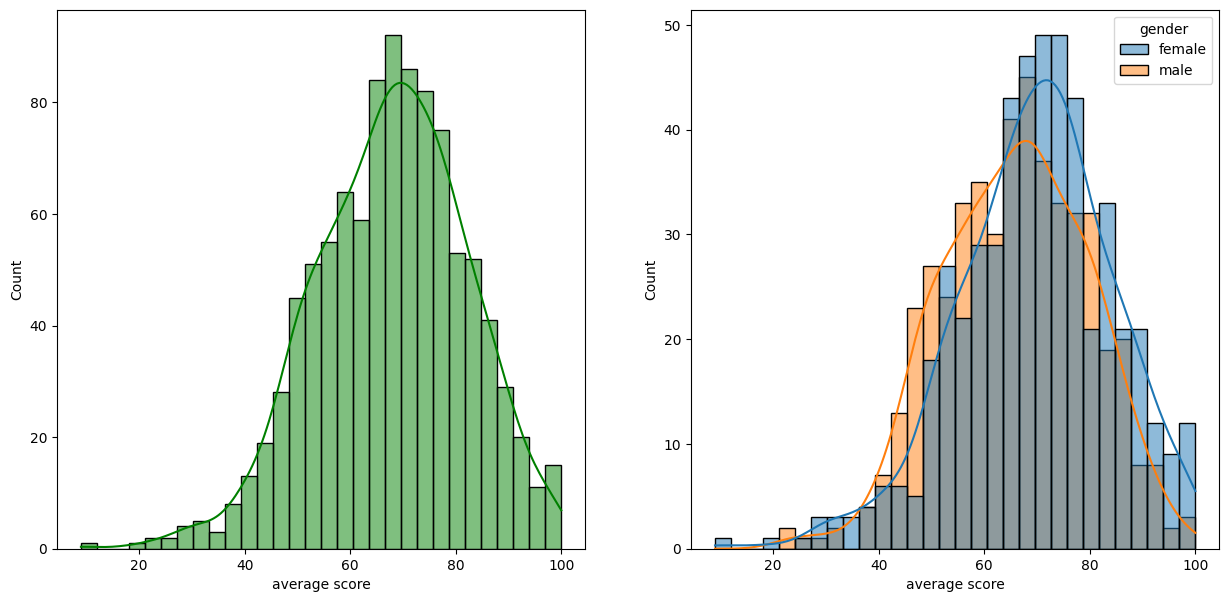

In [23]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
#plt.subplots(nrows=1,ncols=2, index=1)
sns.histplot(data=df,x='average score',bins=30, kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x="average score",bins=30, kde=True, hue="gender")
plt.show()


insight:-girls performance better than boys in average score

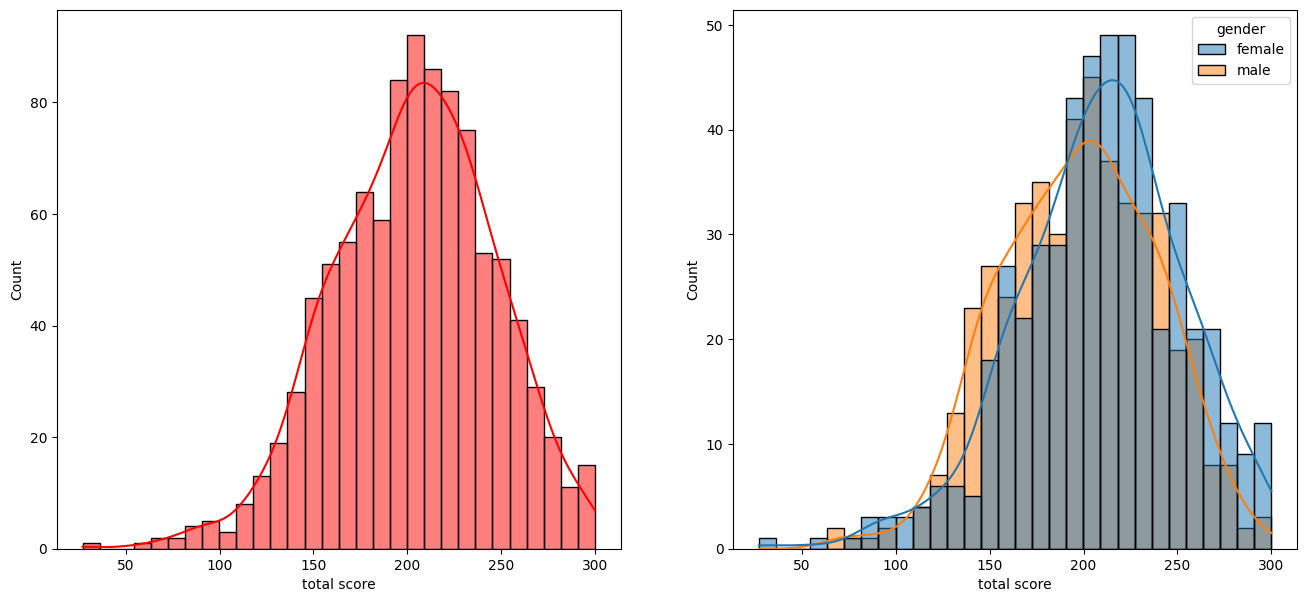

In [24]:
fig,ax=plt.subplots(1,2,figsize=(16,7))
plt.subplot(121)
sns.histplot(data=df,x="total score",bins=30, kde=True,color='r')
plt.subplot(122)
sns.histplot(data=df,x="total score", bins=30,kde=True, hue="gender")
plt.show()

insight:- again girls perform better than boys

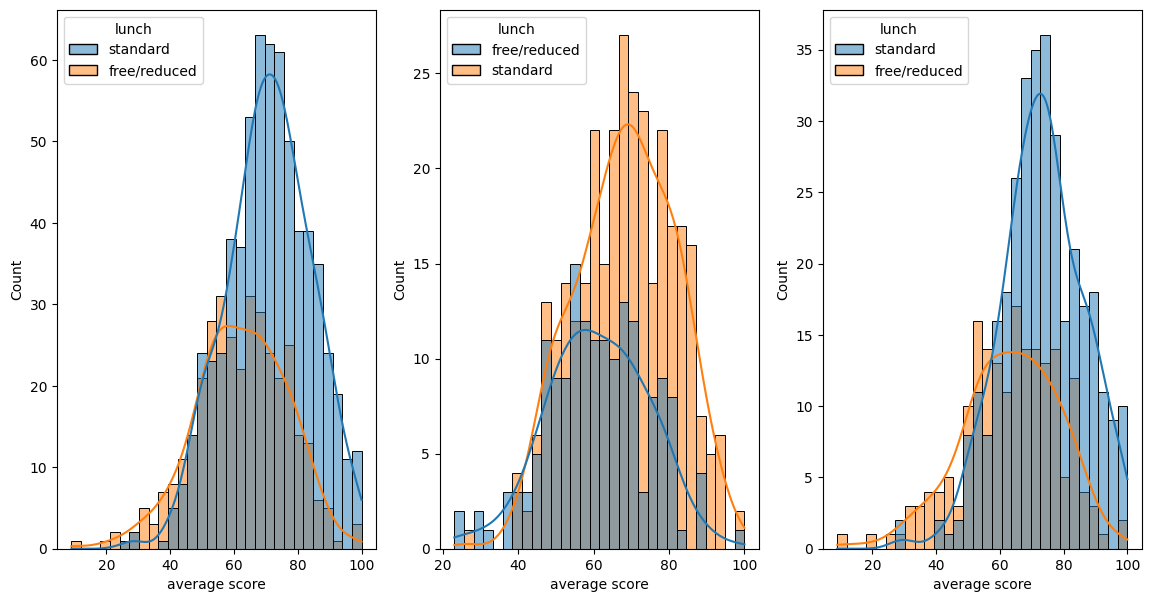

In [25]:
fig,ax=plt.subplots(1,3,figsize=(14,7))
plt.subplot(131)
sns.histplot(data=df,x="average score",bins=30,kde=True,color='g',hue="lunch")
plt.subplot(132)
sns.histplot(data=df[df["gender"]=="male"],x="average score",bins=30,kde=True,color='g',hue="lunch")
plt.subplot(133)
sns.histplot(data=df[df["gender"]=="female"],x="average score",bins=30,kde=True,color='g',hue="lunch")
plt.show()


insight:- standard lunch gives better performance in exam to score well inspite of what the gender is

case:-based on parental _level_of_education

<Axes: xlabel='average score', ylabel='Count'>

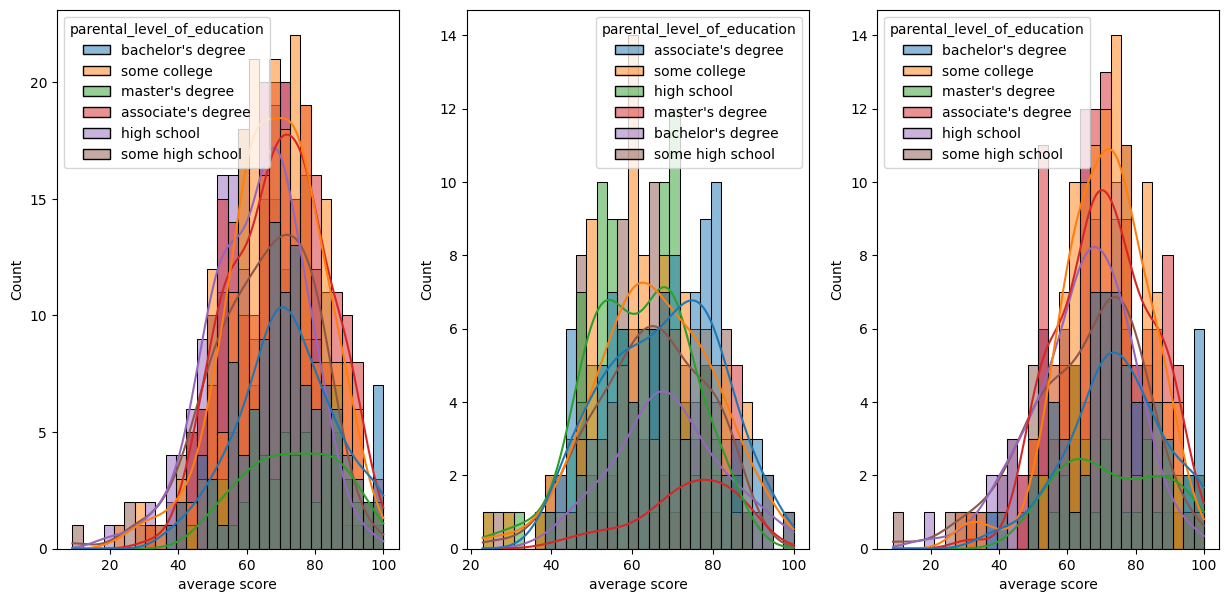

In [36]:
fig,ax=plt.subplots(1,3,figsize=(15,7))
plt.subplot(131)
sns.histplot(data=df,x='average score',bins=30,color='g',kde=True,hue="parental_level_of_education")
plt.subplot(132)
sns.histplot(data=df[df["gender"]=="male"],x='average score',bins=30,color='g',kde=True,hue="parental_level_of_education")
plt.subplot(133)
sns.histplot(data=df[df["gender"]=="female"],x='average score',bins=30,color='g',kde=True,hue="parental_level_of_education")

maximum score of student in all the three subjects


<Axes: title={'center': 'writing score'}, ylabel='writing score'>

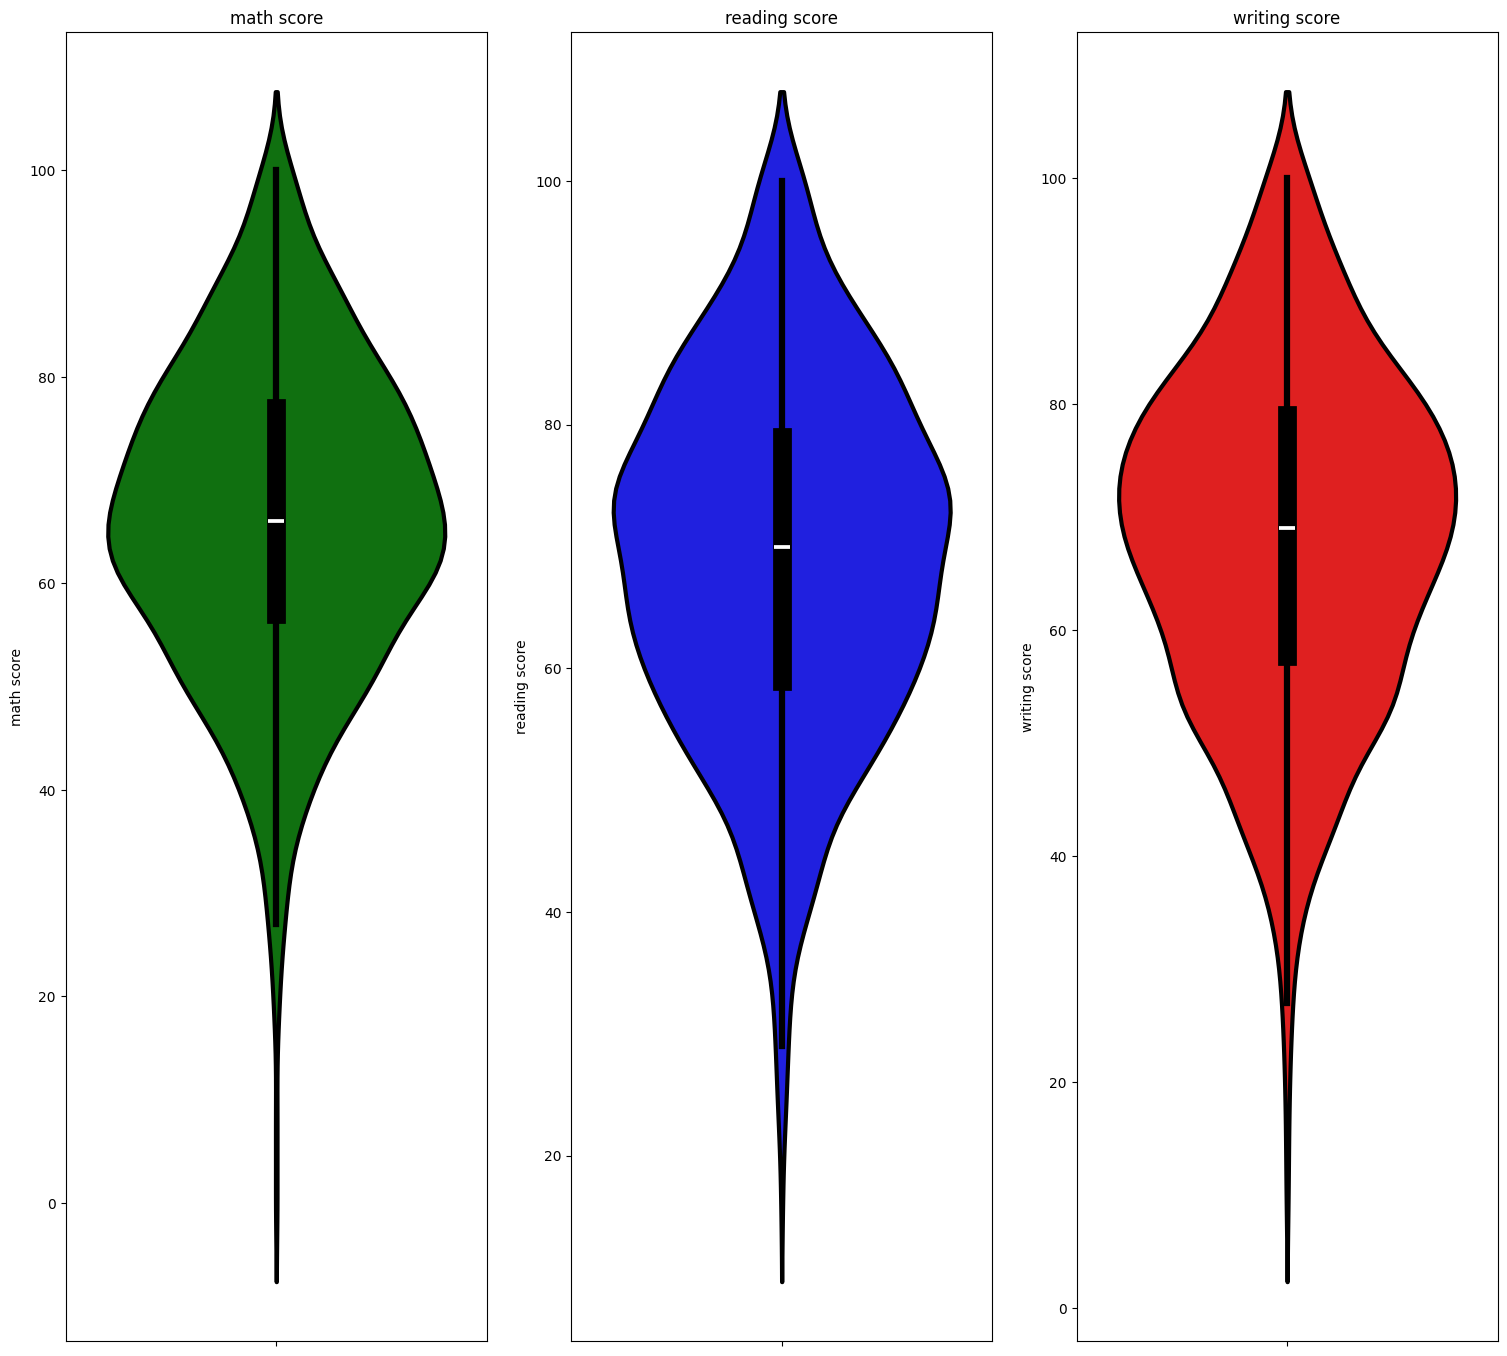

In [ ]:
plt.figure(figsize=(25,17))
plt.subplot(1,4,1)
plt.title("math_socre")
sns.violinplot(data=df, y="math_socre",color='g',linecolor='black',linewidth=3)
plt.subplot(1,4,2)
plt.title("reading_socre")
sns.violinplot(data=df,y="reading_socre",color='blue',linewidth=3,linecolor='black')
plt.subplot(143)
plt.title("writing_score")
sns.violinplot(data=df,y="writing_score",color='red',linecolor='black', linewidth=3)

we can observe that mean score is like around  63 in mathematics 71 in reading and writing

4.3 multivatate analysis using pyplot

([<matplotlib.patches.Wedge at 0x7046252f0b20>,
 [Text(-0.06217041096298424, 1.0982417038160106, ''),
  Text(0.06217041096298411, -1.0982417038160106, '')])

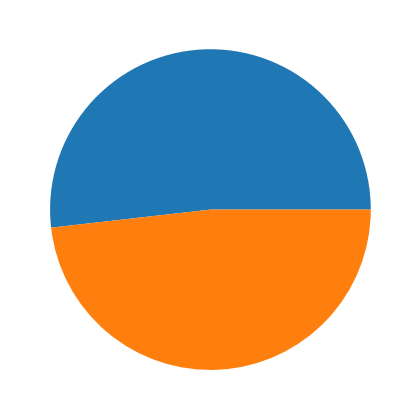

In [ ]:
plt.rcParams['figure.figsize']=(30,12)
plt.subplot(151)
size=df['gender'].value_counts()
color=['red','green']
labels='Male','Female'
plt.pie(size)

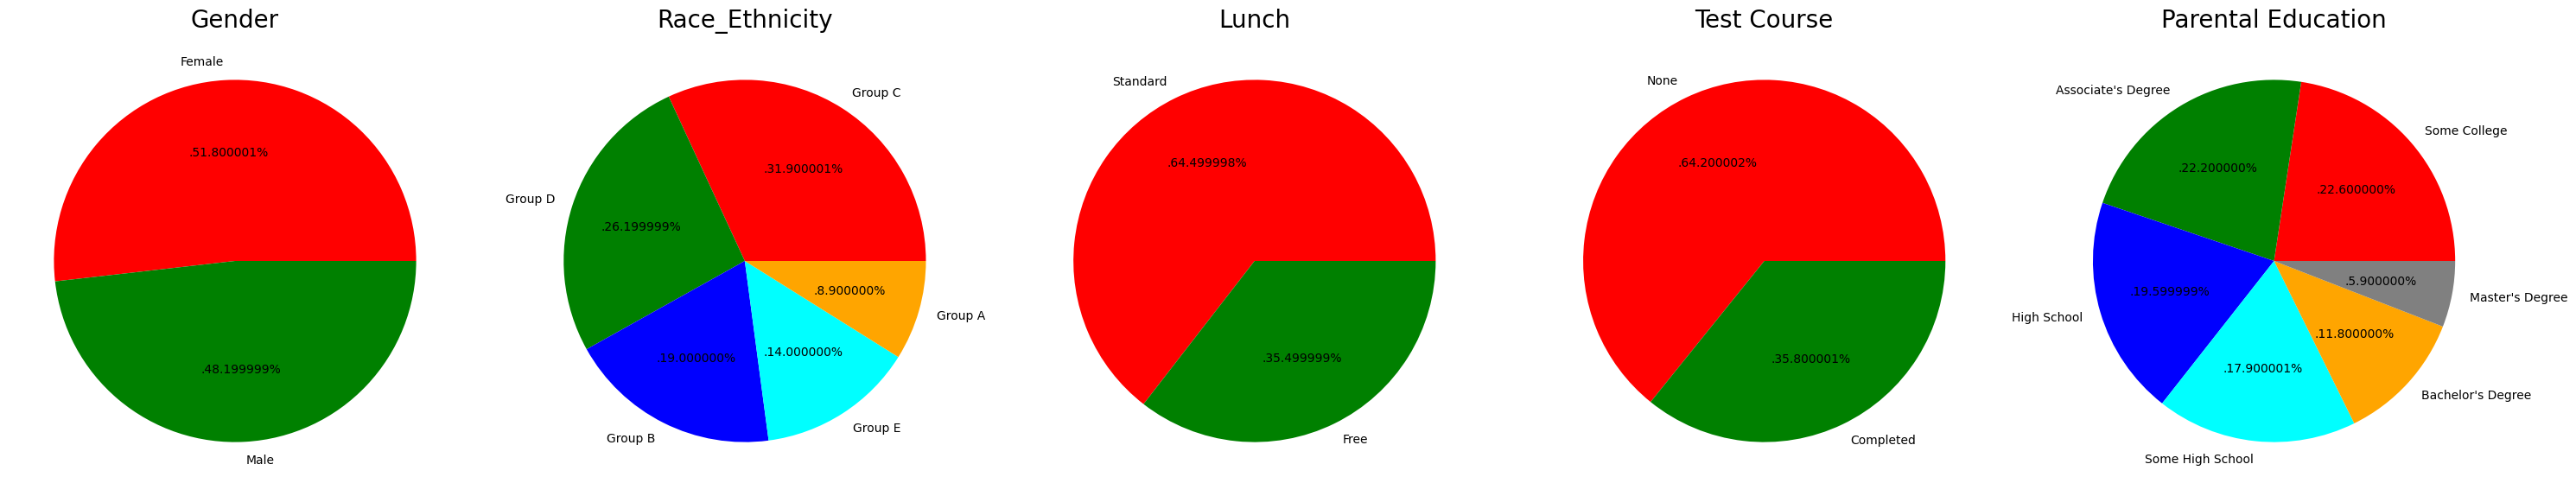

In [38]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race_Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

In [28]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [29]:
"""import numpy as np
temp=np.array([[1,2,3],[4,5,6],[7,8,9]])
temp[0:,:-1]"""

'import numpy as np\ntemp=np.array([[1,2,3],[4,5,6],[7,8,9]])\ntemp[0:,:-1]'